Total points for this HW: 10

Make sure that you run all your codes and that all results are printed.

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np

## Question 1 (15%) 

### This task is to be done with manual calculations rather than using Python.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

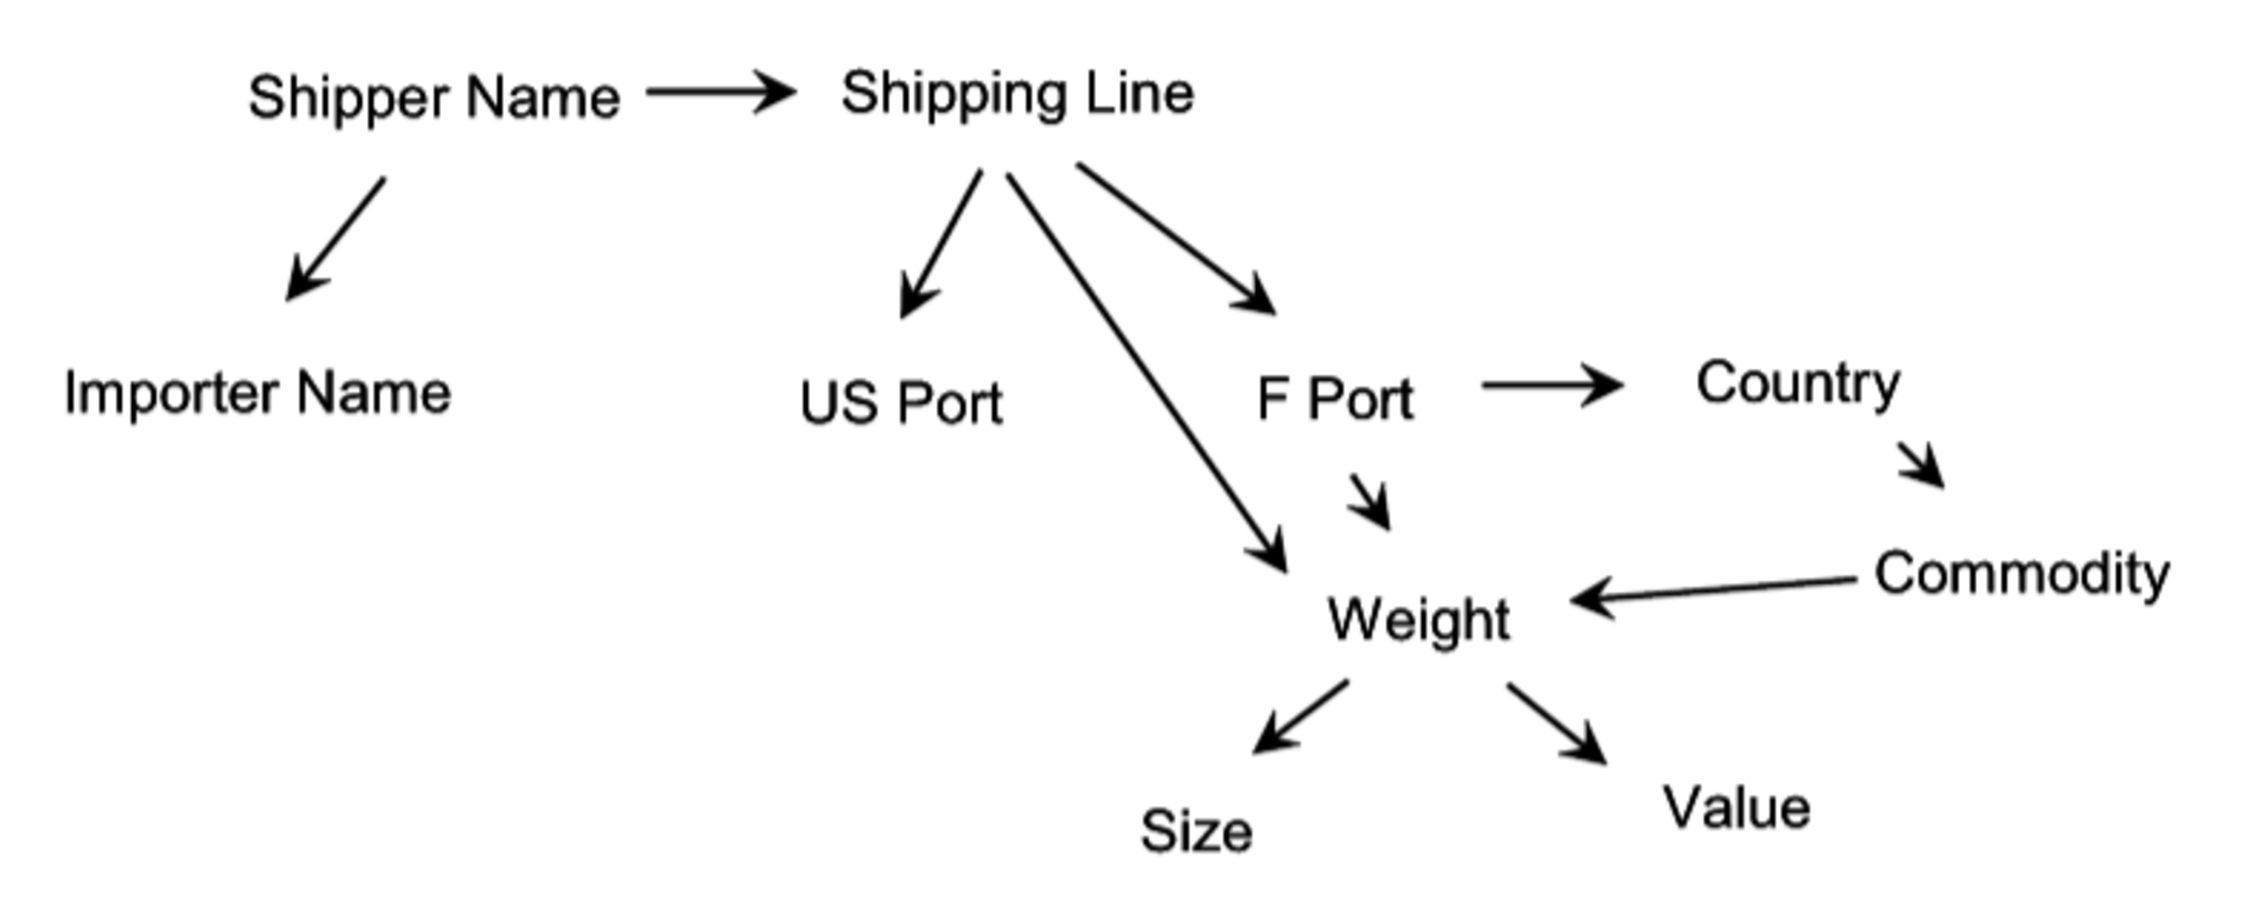

In [2]:
Image('HW3Q1.png')

### 1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6%):

CI (Shipper Name, Value | F Port)?

CI (Shipper Name, Value | Shipping Line)? 

CI (Foreign Port, Commodity | Country)? 

CI (Foreign Port, Commodity | County, Weight)? 

1. Dependent

2. Independent

3. Independent

4. Dependent

### 2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (80%), ASCO (20%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (20%), Los Angeles (80%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (30%), Medium (20%), Heavy (50%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (60%), Heavy (30%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (15%), Medium (15%), Heavy (70%)

Which of the following packages is most anomalous?

a) A light package shipped from Vancouver to Seattle by ASCO

b) A medium package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

### To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9%)

(Your answers here, including all calculations)

(a) P1 = P(Shipping Line=ASCO) × P(Foreign Port=Vancouver | Shipping Line=ASCO) × P(US Port=Seattle | Shipping Line=ASCO) × P(Weight=light | Shipping Line=ASCO, Foreign Port=Vancouver)

= 20% × 100% × 100% × 15% = 3%

(b)P2 = P(Shipping Line=CSCO) × P(Foreign Port=Vancouver | Shipping Line=CSCO) × P(US Port=Seattle | Shipping Line=CSCO) × P(Weight=Medium | Shipping Line=CSCO, Foreign Port=Vancouver)

= 80% × 60% × 20% × 20% = 1.92%

(c)P3 = P(Shipping Line=CSCO) × P(Foreign Port=Yokohama | Shipping Line=CSCO) × P(US Port=Los Angeles | Shipping Line=CSCO) × P(Weight=Heavy | Shipping Line=CSCO, Foreign Port=Yokohama)

= 80% × 40% × 80% × 30% = 7.68%

According to the abive calculations,P2 is the most anomalous likelihood with the lowest probability.

## Question 2. Bayesian Network Learning (35%)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [3]:
from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,0,0,0,1,0,1
2,1,1,0,1,1,1
3,1,0,0,1,1,1
4,2,0,1,0,1,1


### a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10%)

### b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15%)

### c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10%)   

In [4]:
# your answers here

In [5]:
pip install pgmpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import pgmpy
from pgmpy.estimators import HillClimbSearch,K2Score, BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import BayesianEstimator
from pgmpy.factors.discrete import TabularCPD
from collections import defaultdict
from pgmpy.inference import VariableElimination
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster

In [7]:
hc = HillClimbSearch(train)
optimal_model = BayesianNetwork(hc.estimate(scoring_method='BicScore').edges())

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [8]:
print(optimal_model.edges())

[('B', 'A'), ('D', 'A'), ('E', 'A')]


In [9]:
optimal_model.fit(train, estimator=BayesianEstimator, prior_type='K2')

In [10]:
for cpd in optimal_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)

CPD of B:
+------+--------+
| B(0) | 0.5015 |
+------+--------+
| B(1) | 0.4985 |
+------+--------+
CPD of A:
+------+----------------------+-----+----------------------+
| B    | B(0)                 | ... | B(1)                 |
+------+----------------------+-----+----------------------+
| D    | D(0)                 | ... | D(1)                 |
+------+----------------------+-----+----------------------+
| E    | E(0)                 | ... | E(1)                 |
+------+----------------------+-----+----------------------+
| A(0) | 0.4965893587994543   | ... | 0.001349527665317139 |
+------+----------------------+-----+----------------------+
| A(1) | 0.5006821282401092   | ... | 0.5033738191632928   |
+------+----------------------+-----+----------------------+
| A(2) | 0.001364256480218281 | ... | 0.4939271255060729   |
+------+----------------------+-----+----------------------+
| A(3) | 0.001364256480218281 | ... | 0.001349527665317139 |
+------+----------------------+-----

In [11]:
for node in optimal_model.nodes():
    print(optimal_model.local_independencies(node))

(B ⟂ E, D)

(D ⟂ E, B)
(E ⟂ B, D)


In [12]:
training_features = train.drop(columns=['A', 'C', 'F'])
testing_features = test.drop(columns=['A', 'C', 'F'])

In [13]:
predicted_training = optimal_model.predict(training_features)
predicted_testing = optimal_model.predict(testing_features)

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

In [14]:
accuracy_in_sample = (train['A'].reset_index(drop=True) == predicted_training['A']).mean()
accuracy_out_of_sample = (test['A'].reset_index(drop=True) == predicted_testing['A']).mean()


In [15]:
print("In sample accuracy:", accuracy_in_sample)
print("Out of sample accuracy:", accuracy_out_of_sample)

In sample accuracy: 0.5766666666666667
Out of sample accuracy: 0.5645


## Question 3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50%)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

In [16]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [17]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [18]:
# Implementing k-means clustering with k=3
hour_columns = ['hour_' + str(i) for i in range(24)]
hourly_data = data3[hour_columns]
kmeans_model = KMeans(n_clusters=3, random_state=2019)
fitted_kmeans = kmeans_model.fit(hourly_data)
data3['kmeans_label'] = fitted_kmeans.labels_
hourly_data['kmeans_label'] = fitted_kmeans.labels_


D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\gxy\AppData\Local\Temp\ipykernel_29584\694542034.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hourly_data['kmeans_label'] = fitted_kmeans.labels_


In [19]:
hourly_data.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,kmeans_label
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323,2
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444,2
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042,2
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000,2
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235,2


#### a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5%)

#### b) Describe the three different hour-of-day trends represented by these three clusters (5%).

#### c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5%)  

#### d) Do the three clusters have different day-of-week trends? Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences. (5%)

#### e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5%)

#### f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5%)

#### g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20%)


In [20]:
# your answers here

In [21]:
# a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster. (5%)

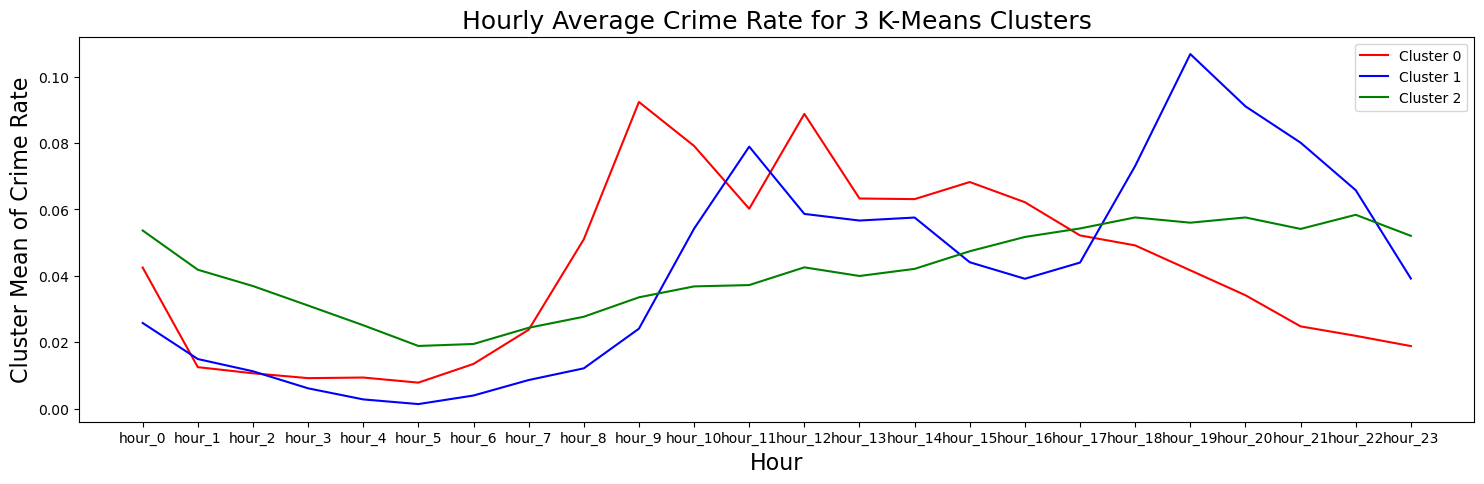

In [22]:
# Calculate the mean values per cluster 
cluster_hour_mean = hourly_data.groupby(['kmeans_label']).mean()  # Corrected the spelling of 'label'

fig, ax = plt.subplots(figsize=(18, 5))

# Create a plot to visualize the hourly average crime rates for the 3 clusters
# Plotting each cluster with a specific color
ax.plot(cluster_hour_mean.loc[0], label='Cluster 0', color='red')  # Color red for Cluster 0
ax.plot(cluster_hour_mean.loc[1], label='Cluster 1', color='blue')  # Color blue for Cluster 1
ax.plot(cluster_hour_mean.loc[2], label='Cluster 2', color='green')  # Color green for Cluster 2

ax.legend(loc='upper right')
ax.set_title('Hourly Average Crime Rate for 3 K-Means Clusters', fontsize=18)
ax.set_xlabel('Hour', fontsize=16)
ax.set_ylabel('Cluster Mean of Crime Rate', fontsize=16)

plt.show()

In [23]:
# b) Describe the three different hour-of-day trends represented by these three clusters (5%).


Red line for Cluster 0: From midnight until the wee hours of the morning, this cluster often exhibits a declining trend in crime rates. 

Blue line for Cluster 1: This cluster's crime rate is highest around midnight and drops dramatically until it reaches its lowest point at hour 5. 

Green Line for Cluster 2: In the early morning hours, this cluster's progress is rather steady.

In [24]:
# c) Do you notice any consistent trends about which crime types are assigned to which cluster? Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5%)


In [25]:
data3.groupby(['kmeans_label', 'crime_type'])['Category'].count()

kmeans_label  crime_type                                            
0             ASSAULT: PRO EMP HANDS NO/MIN INJURY                      1
              BATTERY: PRO EMP HANDS NO/MIN INJURY                      1
              BURGLARY: UNLAWFUL ENTRY                                  1
              DECEPTIVE PRACTICE: ATTEMPT - FINANCIAL IDENTITY THEFT    1
              DECEPTIVE PRACTICE: BOGUS CHECK                           1
                                                                       ..
2             THEFT: POCKET-PICKING                                     1
              THEFT: PURSE-SNATCHING                                    1
              WEAPONS VIOLATION: RECKLESS FIREARM DISCHARGE             1
              WEAPONS VIOLATION: UNLAWFUL USE HANDGUN                   1
              WEAPONS VIOLATION: UNLAWFUL USE OTHER DANG WEAPON         1
Name: Category, Length: 119, dtype: int64

crime type for Cluster 0 : assault, deceptive practice, and other


crime type for Cluster 1 : narcotics and other offense (gun related, license, and sex offender)


crime type for Cluster 2 : theft and weapon violations

In [26]:
# d) Do the three clusters have different day-of-week trends? Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences. (5%)


In [27]:
import matplotlib.pyplot as plt

# Selecting specific columns from data3. Verify columns indexes are correct.
day_data = data3.iloc[:, [2, 3, 4, 5, 6, 7, 8, 110]]
day_data['kmeans_label'] = data3['kmeans_label']  

C:\Users\gxy\AppData\Local\Temp\ipykernel_29584\1373386659.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  day_data['kmeans_label'] = data3['kmeans_label']


In [28]:
# Group by 'kmeans_label' and calculate mean
cluster_day_mean = day_data.groupby(['kmeans_label']).mean()

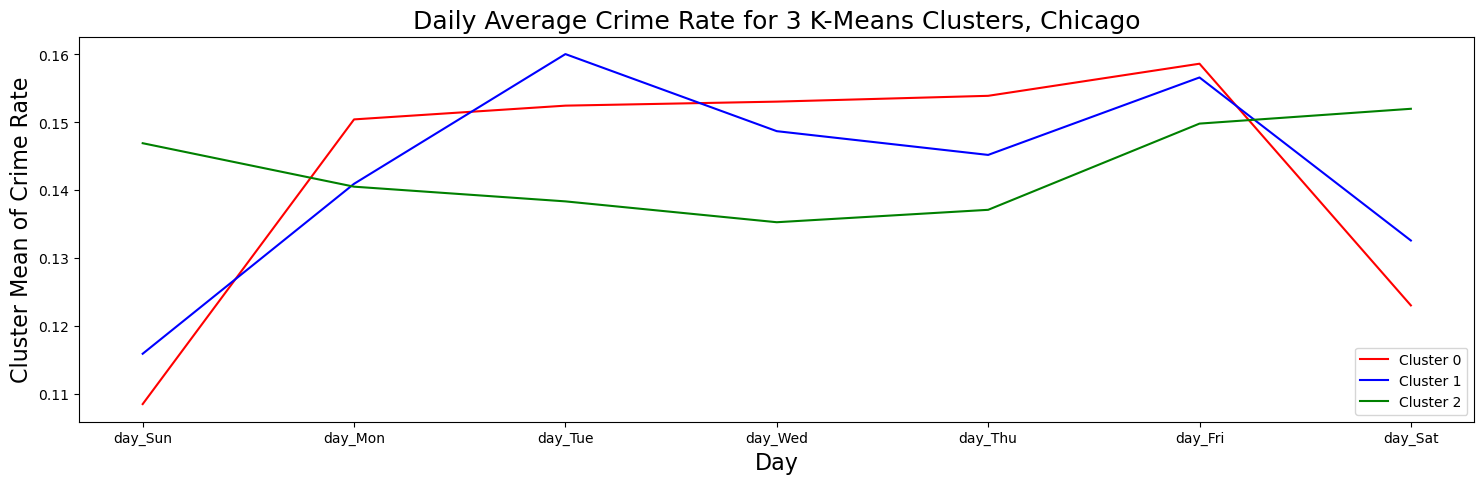

In [29]:
# Plotting the results
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(cluster_day_mean.loc[0], label='Cluster 0', color='red')  # Red color for Cluster 0
ax.plot(cluster_day_mean.loc[1], label='Cluster 1', color='blue')  # Blue color for Cluster 1
ax.plot(cluster_day_mean.loc[2], label='Cluster 2', color='green')  # Green color for Cluster 2

ax.legend(loc='lower right')
ax.set_title('Daily Average Crime Rate for 3 K-Means Clusters, Chicago', fontsize=18)
ax.set_xlabel('Day', fontsize=16)
ax.set_ylabel('Cluster Mean of Crime Rate', fontsize=16)
plt.show()

In [30]:
# e) Do the three clusters affect different types of communities/neighborhoods? To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster. You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.). You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5%)


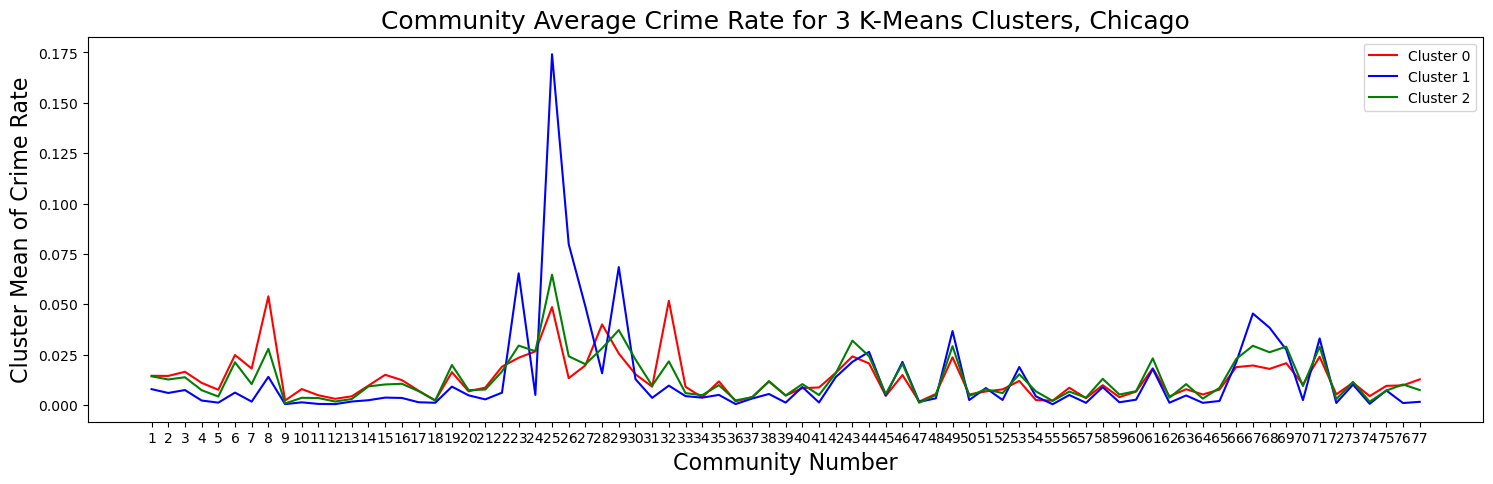

In [31]:
import matplotlib.pyplot as plt

# Assuming 'kmeans_label' is the correct column name and 'community_area_1' to 'community_area_last'
# are valid column names. Check and adjust as necessary.
community_data = data3.loc[:, 'community_area_1':'kmeans_label']
community_data['kmeans_label'] = data3['kmeans_label']  # Corrected column name for consistency.

# Group by 'kmeans_label' and calculate the mean
cluster_com_mean = community_data.groupby(['kmeans_label']).mean()

# Setting up the plot with better axis handling
fig, ax = plt.subplots(figsize=(18, 5))
ax.plot(cluster_com_mean.loc[0], label='Cluster 0', color='red')  # Red color for Cluster 0
ax.plot(cluster_com_mean.loc[1], label='Cluster 1', color='blue')  # Blue color for Cluster 1
ax.plot(cluster_com_mean.loc[2], label='Cluster 2', color='green')  # Green color for Cluster 2

ax.legend(loc='upper right')
ax.set_title('Community Average Crime Rate for 3 K-Means Clusters, Chicago', fontsize=18)
ax.set_ylabel('Cluster Mean of Crime Rate', fontsize=16)
ax.set_xlabel('Community Number', fontsize=16)

# Setting custom ticks for clarity; adjust the range if the number of communities is different
ax.set_xticks(range(len(cluster_com_mean.columns)))  # Adjust based on the number of community areas
ax.set_xticklabels(range(1, len(cluster_com_mean.columns) + 1))  # Adjust if needed

plt.show()

Select five locations with the highest probability for each cluster to observe its characteristics.

In [32]:
# Filtering data4 DataFrame for specific Community Area Numbers corresponding to each cluster
cluster_0_demo = data4.loc[data4['Community Area Number'].isin([8, 32, 35, 15, 77])]
cluster_1_demo = data4.loc[data4['Community Area Number'].isin([23, 25, 29, 49, 67])]
cluster_2_demo = data4.loc[data4['Community Area Number'].isin([19, 43, 58, 61, 63])]

In [33]:
# Creating a summary DataFrame to store the mean values for selected columns
summary = pd.DataFrame()

In [34]:
# Calculating the mean of columns 4 through 10 (inclusive) for each cluster
summary.loc['mean0', data4.columns[4:11]] = cluster_0_demo.iloc[:, 4:11].mean()
summary.loc['mean1', data4.columns[4:11]] = cluster_1_demo.iloc[:, 4:11].mean()
summary.loc['mean2', data4.columns[4:11]] = cluster_2_demo.iloc[:, 4:11].mean()

In [35]:
# Calculating the overall mean for the same columns in the entire dataset
summary.loc['totalmean', data4.columns[4:11]] = data4.iloc[:, 4:11].mean()

In [36]:
# Displaying the summary DataFrame
summary

,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT
mean0,2.680000,17.400000,10.540000,9.780000,24.920000,47141.400000,15.219242
mean1,7.160000,31.960000,23.460000,26.120000,40.100000,14207.600000,17.527254
mean2,11.140000,25.160000,17.940000,37.880000,38.000000,14576.800000,14.015106
totalmean,4.923377,21.766234,15.372727,20.341558,35.746753,25563.168831,12.442935


Cluster 0 features a high income and a lower percentage of congested dwellings. All of the communities are situated close to the loop area, as can be seen by consulting the Chicago community map. Increased rates of assault and a variety of other crimes may be caused by increased population movement. 
Cluster 1 includes a high percentage of households living in poverty and a high percentage of jobless people aged 16 and older. 
Cluster 2 contains a significant percentage of people under 18 or over 64, as well as those aged 25 and older without a high school degree.

In [37]:
# f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5%)


In [38]:
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77,kmeans_label
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833,2
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407,2
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152,2
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000,2
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000,2


In [40]:
# g) For part g, you will use the same dataset to compare the clusters produced by several different methods. But this time you should cluster using only the day-of-week (not hour-of-day) attributes (day_Sun..day_Sat). Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric. In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify). For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20%)

In [41]:
cluster_data = data3.loc[:,"day_Sun":"day_Sat"]

1. k-means

In [42]:
cluster_num = {}
for n_clusters in range(2,10):
    clusterer = KMeans(random_state=2019, n_clusters=n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    #centers = clusterer.cluster_centers_

    score = silhouette_score (cluster_data, preds)
    cluster_num[n_clusters] = score

best_cluster = max(cluster_num, key=cluster_num.get)

kmeans_cl = KMeans(n_clusters = best_cluster, random_state= 2019)
fit_kmeans = kmeans_cl.fit(cluster_data)
kmeans_data = cluster_data.copy()
kmeans_data['kmeans_lable'] = fit_kmeans.labels_

print ("\n The cluster number for Single link is:",best_cluster, "distribution of each category is: ")
print (kmeans_data['kmeans_lable'].value_counts())

D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo


 The cluster number for Single link is: 2 distribution of each category is: 
kmeans_lable
1    63
0    56
Name: count, dtype: int64


2. Gaussian mixture models

In [43]:
cluster_num = {}
for n_clusters in range(2,10):
    clusterer = GaussianMixture(random_state=2019, n_components=n_clusters)
    preds = clusterer.fit_predict(cluster_data)
    #centers = clusterer.cluster_centers_

    score = silhouette_score (cluster_data, preds)
    cluster_num[n_clusters] = score

best_cluster = max(cluster_num, key=cluster_num.get)

gmm = GaussianMixture(random_state=2019, n_components=best_cluster)
fit_gmm = gmm.fit_predict(cluster_data)


gmm_data = cluster_data.copy()
gmm_data['gmm_lable'] = fit_gmm

print ("\n The cluster number for Single link is:",best_cluster, "distribution of each category is: ")
print (gmm_data['gmm_lable'].value_counts())

D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai


 The cluster number for Single link is: 2 distribution of each category is: 
gmm_lable
1    93
0    26
Name: count, dtype: int64


D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\annaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
Z_single = linkage(cluster_data, 'single')
cluster_num = {}
for n_clusters in range(2,10):
    preds = fcluster(Z_single, n_clusters, criterion='maxclust')

    score = silhouette_score (cluster_data, preds)
    cluster_num[n_clusters] = score

best_cluster = max(cluster_num, key=cluster_num.get)

sl_label=fcluster(Z_single, best_cluster, criterion='maxclust') 
sl_data=cluster_data.copy()
sl_data['sl_label'] = sl_label

print ("\n The cluster number for Single link is:",best_cluster, "distribution of each category is: ")
print (sl_data['sl_label'].value_counts())


 The cluster number for Single link is: 2 distribution of each category is: 
sl_label
1    118
2      1
Name: count, dtype: int64


3. Bottom-up hierarchical clustering with "complete link" distance metric

In [45]:
Z_complete = linkage(cluster_data, 'complete')
cluster_num = {}
for n_clusters in range(2,10):
    preds = fcluster(Z_complete, n_clusters, criterion='maxclust')

    score = silhouette_score (cluster_data, preds)
    cluster_num[n_clusters] = score

best_cluster = max(cluster_num, key=cluster_num.get)

cl_label=fcluster(Z_complete, best_cluster, criterion='maxclust') 
cl_data=cluster_data.copy()
cl_data['cl_label'] = cl_label

print ("\n The cluster number for Single link is:",best_cluster, "distribution of each category is: ")
print (cl_data['cl_label'].value_counts())


 The cluster number for Single link is: 2 distribution of each category is: 
cl_label
2    117
1      2
Name: count, dtype: int64


Cluster output is comparable for clusters with a single link and complete link. Each of them has two categories, one of which contains nearly every element in the datasets. In this instance, the final results of both forms of bottom-up hierarchical clustering would be comparable since we did not filter out links.